# **딥러닝 1 - Image**

## 1. 퍼셉트론

### 1-1. 인경신경망이란?

인공신경망 : 우리 뇌의 신경망을 모방한 모델
1. 다수의 입력을 받아 각각에 가중치 적용
2. 종합한 값이 일정 기준을 넘으면
3. output 출력

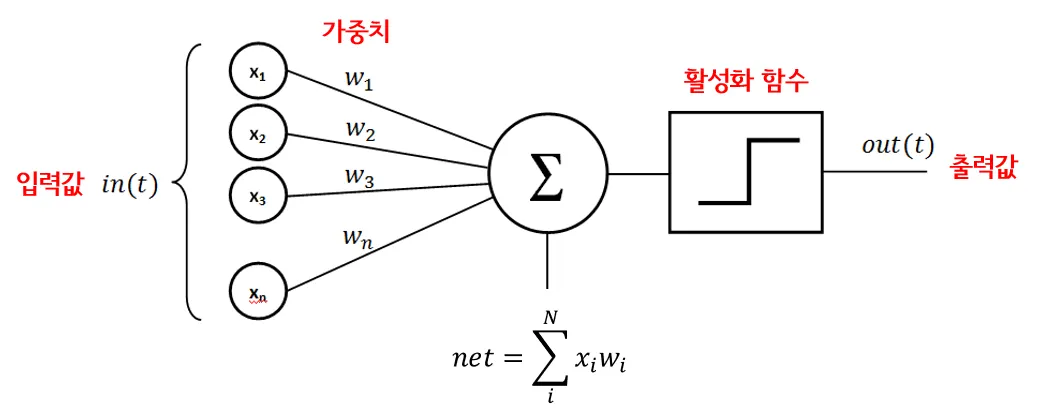

퍼셉트론 : 초기 형태의 인공신경망    
입력 -> 가중합 -> 활성화 함수 -> 출력    
training : 원하는 출력값을 내보내도록 가중치를 조정해가는 작업

- 가중치 : 입력값이 출력값에 주는 영향력(중요도)을 결정함
- 활성화함수 : 퍼세븥론은 신호가 일정 이상의 값을 넘으면 1, 넘지 못하면 0을 출력함 (계단 함수)    
- 임계값 : 계단 함수에 사용된 임계치로, 세타로 표현
- 편향 : 계단 함수에서 구현한 식에서 임계값을 좌변으로 넘기면 편향으로 표현 가능

### 1-2. 단층 퍼셉트론과 그 한계

단층 퍼셉트론 : 두개의 층 (입력층, 출력층)으로만 이루어진 퍼셉트론

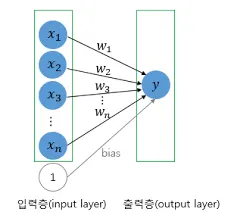

논리 게이트 중 AND 게이트, NAND 게이트, OR 게이트를 쉽게 구현 가능 (선형으로 분리 가능)      
하지만 XOR 게이트는 구현 불가능 (비선형으로 분리해야함)

### 1-3. 다층 퍼셉트론 (MLP)

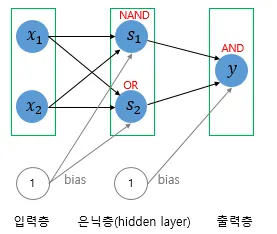

두개 이상의 은닉층을 갖는 퍼셉트론으로, 딥러닝의 시초 모델로 발전     
심층 신경망 : 은닉층이 2개 이상인 신경망    
딥러닝 : 심층 신경망을 학습시킴

## 2. 딥러닝 모델은 어떻게 학습할까?

### 2-1. 순전파와 역전파

딥러닝의 학습 알고리즘     

(1) 순전파를 통해 입력값으로부터 예측을 수행

(2) 오차 계산을 통해 예측 정확도를 측정

(3) 역전파를 통해 출력층에서 다시 입력층 방향으로 오차를 전달

(4) 가중치를 업데이트

(5) 1~4를 반복…

연쇄 법칙 : 서로 얽혀있는 변수 간의 상관관계를 계산하는 방법    
-> A가 C에 미치는 영향은, B가 C에 미치는 영향과 A가 B에 미치는 영향을 곱한 것

기울기 소실 문제 : 은닉층의 개수가 많아질 수록 앞쪽 은닉층의 영향력은 거의 사라짐

### 2-2. 손실 함수

손실 함수 : 모델이 정확한지 오차를 계산 = 실제값과 예측값의 차이를 수치화하는 함수

$$
-\frac{1}{N}\sum(y-\hat{y})^2
$$

$$
y : 예측값 / \hat{y} : 실제값
$$

1. 평균 제곱 오차 (MSE)    
- 회귀 문제에 적합

$$
L= -(y \log \hat{y} + (1-y) \log(1-\hat{y}))
$$

2. 이진 크로스 엔트로피 (BCE)
- 이진 분류 문제일때 적합
- 낮은 확률로 예측해서 맞추거나 높은 확률로 예측해서 틀리는 경우 손실이 더 큼

$$
-\sum y \log \hat{y}
$$

$$
y : 원-핫 인코딩 값 (1,0)/  \hat{y} : 예측값(확률)
$$

3. 크로스 엔트로피 오차 (CEE)
- 다중 클래스 분류 문제에서 예측 확률이 실제 클래스와 얼마나 일치하는지 평가할때 적합

### 2-3. 활성화 함수

활성화 함수 : 출력값을 다음 단계에서 쓸 수 있는 형태로 바꿔주는 역할   

가중치 : 입력값이 결과에 얼마나 영향을 미치는지를 결정하는 값  

편향 : 활성화 함수의 출력값을 조정하는 값으로 기준점 역할을 수행

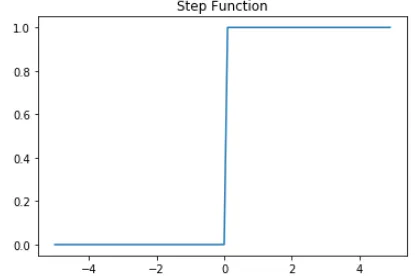

1. 계단함수 (단층 퍼셉트론)
- 입력 신호 : 입력값과 가충치의 곱
- 출력 신호 : 1과 0

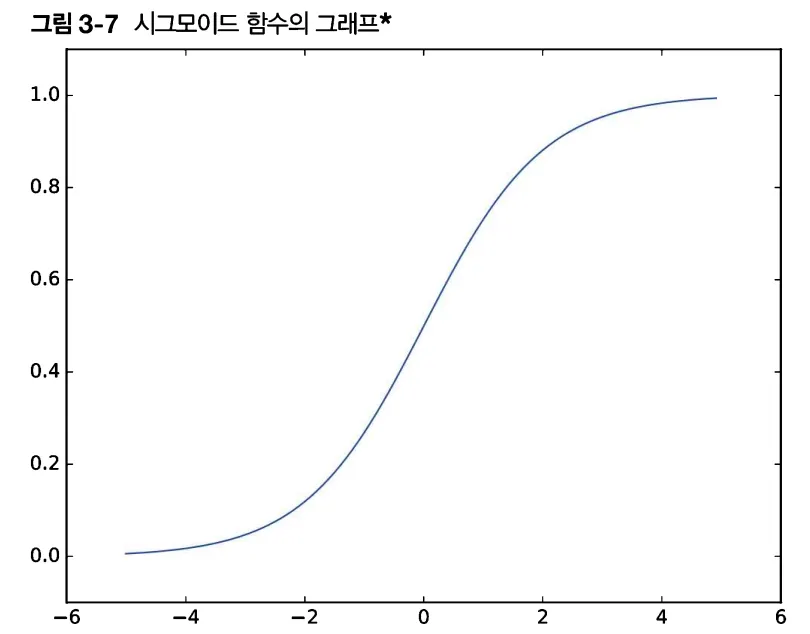

2. 시그모이드 함수
- 입력 신호를 0과 1사이로 변환하는 역할을 수행
- 함수는 직선이 아니라 곡선 형태의 비선형 함수

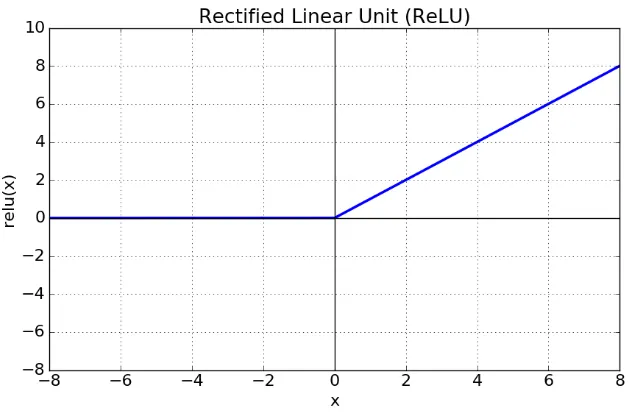

3. ReLU 함수
- 입력이 0을 넘으면 그 값을 그대로 출력하고, 0 이하면 0을 출력하는 비선형 함수
- 간단하지만 딥러닝에서 가장 많이 사용함
- 계산이 간단하고, 비선형성을 제공, 같은 신경망에서도 역전파가 잘 전달 (기울기 소실 방지)

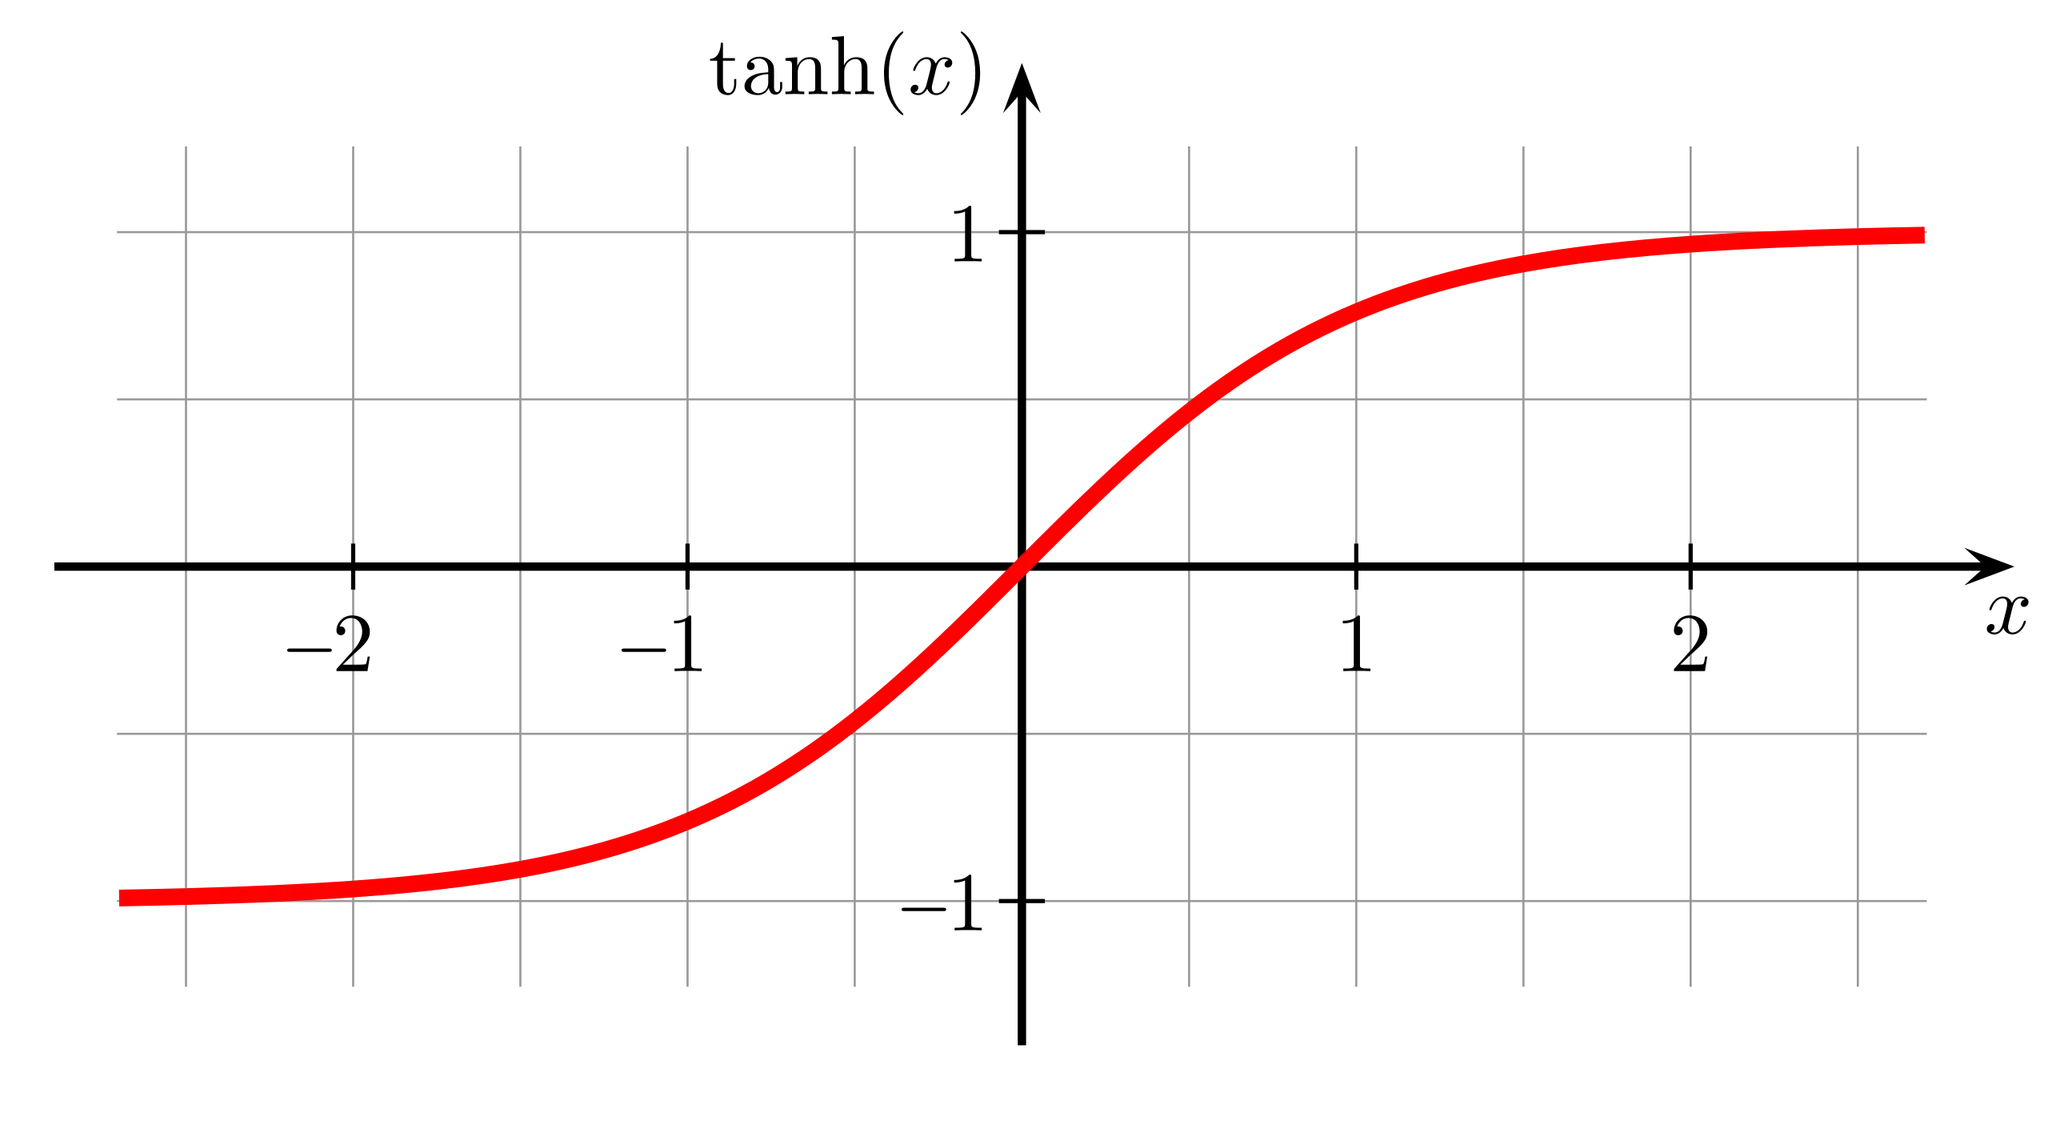

4. Tanh 쌍곡탄젠트 함수
- 시그모이드 함수의 변형 (-1~1)

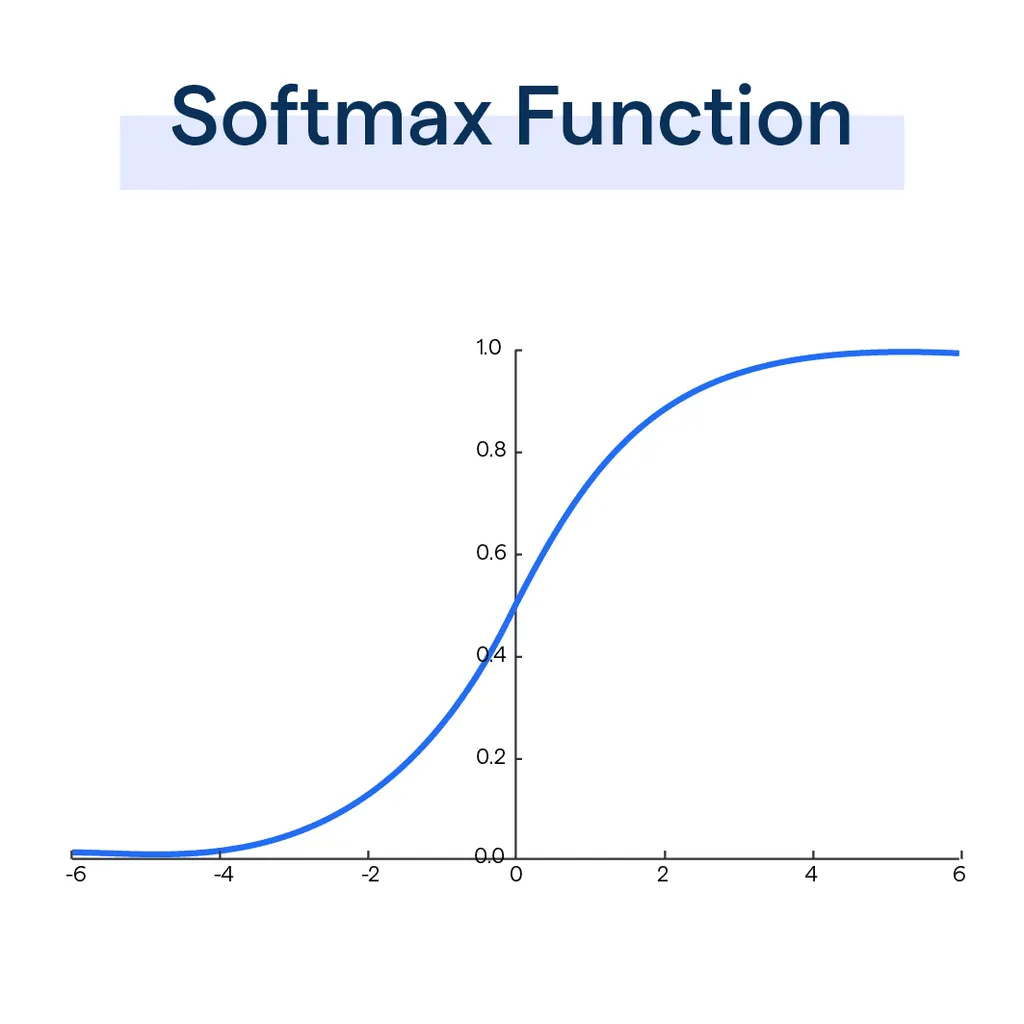

5. Softmax 함수
- 시그모이드 함수와 비슷하지만, 다중 클래스 분류 문제의 활성화 함수로 사용
- 출력 값을 확률로 변환함으로서 개별 클래스의 활률을 알 수 있음
- 분류 문제에서 손실 함수와 자연스럽게 연결되는 장점이 있음 (크로스 엔트로피 손실 함수)

### 2-4. 경사 하강법과 옵티마이저

경사 하강법 : 오차를 가장 작게 만드는 가중치와 편향을 찾는 방법

배치 : 학습 과정에서 가중치와 같은 매개 변수를 조정하기 위해 사용하는 데이터의 묶음

 
이포크 : 모든 데이터셋을 학습하는 횟수를 의미

이터레이션, 스텝 : 한 번의 에포츠를 끝내기 위해서 필요한 배치의 수

1. 배치 경사 하강법 : 오차를 구할 때 전체 데이터를 한 묶음으로 묶음
- 업데이트 횟수가 적음
- 메모리가 많이 필요, 수렴이 안정적

2. 배치 크기가 1인 확률적 경사 하강법 
- 자원이 적은 컴퓨터에서도 쉽게 사용 가능
- 매개변수의 변경폭이 불안정하고, 정확도가 낮을 수 있음

3. 미니 배치 경사 하강법
- 배치 크기를 적절히 지정
- 일반적으로 2의 n승에 해당하는 숫자로 선택 (기본값 32)

**옵티마이저**

1. 모멘텀 : 변수가 가던 방향으로 계속 가도록 한 시점 전의 접선의 기울기 값을 일정 비율 반영 (방향)

2. 알엠에스프롭 : 각 학습률을 조정 (급한 경사는 속도 줄이고 완만할땐 증가) (스텝)

3. 아담 : 방향과 스텝 사이즈를 적절하게 합친 방법

### 2-5. 학습을 향상시키는 기법

데이터 증강 : 기존 데이터에서 다양한 변형을 만들어 학습 데이터를 늘림
1. 모델 성능의 향상
2. 데이터 의존성 감소
3. 과적합 완화
4. 데이터 프라이버시 보호


전이 학습 : 한 문제에서 학습한 지식을 다른 관련된 문제에 활용해서 모델의 성능을 높이는 방법
- 계산 비용 절감
- 데이터셋 크기 문제의 완화
- 일반화 가능성 향상
- 성능의 향상 
- 핵심 : pre-trained model & fine-tuning

## 합성곱 신경망 (CNN)

### 3-1. 왜 MLP가 아닌 CNN을 사용할까?

픽셀 : 입력 이미지의 가장 기본적인 데이터 단위 (작은 직사각형 형태)   
채널 : 픽셀의 색을 숫자로 표현하는 방식 (그레이스케일, RGB, HSV 등)

CNN = (Conv + Pool) + ... + (Conv + Pool) + Flatten + FC Layer + … +FC Layer

CNN 모델은 이미지의 위치별 특징을 추출하는 부분과 클래스를 분류하는 부분으로 나눌 수 있다.

- convolution으로 특징 추출
- pooling으로 차원 축소
- 어떠 영역에 특정한 특징이 존재하는가를 보기 때문에 위치에 무과함



### 3-2. 합성곱과 풀링

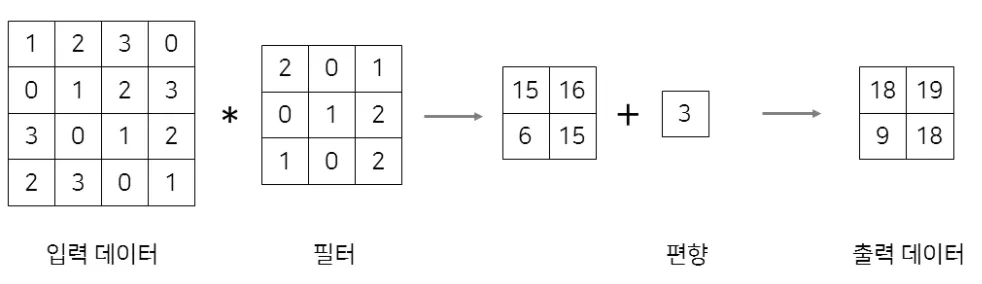

특징 추출 (Feature Learning) - Convolution, Pooling이 담당

1. Convolution Layer : 전체 이미지를 일정 크기의 필터로 훑으며서 이미지의 특징을 학습
- 필터 또는 커널이 이미지 위를 슬라이딩
- 각 위치에서 요소별 곱셈 후 합계 계산
- 결과를 Feature Map에 저장

2. Padding : filter를 거치며 정보를 읽어버리는 것을 막기 위해 이미지 바깥을 0으로 둘러싸는것
3. stride : 이미지를 몇 칸씩 점프하면서 훑을 것인지 결정하는 값 (커질수록 feature map 크기 작아짐)

4. Pooling : 피처맵에서 특징을 추출하기 위해 이미지를 격자 형태로 분할한 뒤 값을 취하는 것
- Max pooling : 최댓값 선택
- Average Pooling : 평균값 선택

### 3-3. 대표적인 CNN 아키텍처

1. Alexnet : 머신러닝에서 벗어나 최초로 GPU를 이용해 학습한 대규모 CNN 모델
2. VGGNet : 이미지 인식에 강한 깊은 층의 CNN 모델
3. ResNet : 잔차 연결 개념을 도입해 깊은 신경망의 소실 문제를 해결한 모델

## 4. 이미지 딥러닝 응용

### 4-1. 이미지 분류 (Image Classification)

아이디어: 이미지를 수치 데이터(픽셀 값)로 인식하고, 사전 정의된 클래스 중 하나로 분류
- AlexNet : 비교적 단순한 구조, 초기 CNN 모델들
- VGG : 더 깊은 구조, 복잡한 블록 구조 적용
- ResNet : 매우 깊은 네트워크 가능
- Vision Transformer : Transformer 구조 응용 -> 패치 기반 입력 처리

### 4-2. 객체 탐지

아이디어 : 객체 검출은 한 이미지에서 객체와 이 객체를 둘러싸는 가장 작은 직사각형으로 정의되는 bounding box를 찾는 작업
- CNN을 통해 Feature Map을 얻고, 그 위에 두가지 head를 올림 
    - classification head: 객체의 클래스 예측
    - regression head : 객체의 위치 자표 예측
- 대표모델 : YOLO, Faster R-CNN,SSD

### 4-3. 이미지 캡셔닝

아이디어 : 이미지 내에 있는 객체에 대한 판단 뿐 아니라 객체들 간의 관계를 파악하고 자연어의 형태로 표현

1. CNN을 이용한 특징 추출
2. Attention Network 를 이용하여 단어 생성
3. RNN을 이용하여 문장 완성